In [6]:
%pylab inline
import sys
sys.path.append('../build/')
from pyswarm import pso
from transformations import quaternion_matrix, euler_matrix
import versor as vsr
np.set_printoptions(precision=6, suppress=True)

Populating the interactive namespace from numpy and matplotlib


versor/cga.py:4: RuntimeWarning: to-Python converter for vsr::Multivector<vsr::algebra<vsr::metric<4, 1, true>, double>, vsr::Basis<(short)1, (short)2, (short)4, (short)8, (short)16> > already registered; second conversion method ignored.
  from libversor import (Biv, Bst, Cir, Con, Dil, Dll, Dlp, Dls, Drb, Drt, Drv,


In [ ]:
# def generate_dataset(n_points, sigma, mu):
#     n_points = n_points
#     r = euler_matrix(0.0,0.0,np.pi/3.0)[:3,:3]
# #     angles = np.pi * np.random.randn(3)
# #     r = euler_to_matrix(angles[0], angles[1], angles[2])[:3,:3]
#     points_a = np.random.normal(0.0,0.8,(n_points,3))
# #     points_a = np.array([point / np.linalg.norm(point) for point in points_a])
#     points_b = np.array([np.dot(r,point.reshape(3,1)).reshape(3) + np.array([0.0,0.0,1.0]) for point in points_a])
#     # Add noise to the rotated point cloud
#     sigma = sigma
#     mu = mu
#     points_b_noisy = points_b + sigma * np.random.randn(n_points,3) + mu
#     points_b_noisy = np.array([point / np.linalg.norm(point) for point in points_b_noisy])
#     return (r, points_a, points_b, points_b_noisy)

In [7]:
n = 10
motor = vsr.Trs.from_vector(vsr.Vec(1,1,1)) * vsr.Rot.from_bivector(vsr.Biv(0,1,0) * np.pi/6.0)
points_a = [vsr.Vec(*np.random.normal(0.0, 0.8, 3)).null() for i in range(n)]
points_b = [point.spin(motor) for point in points_a]

In [32]:
# def myfunc(q):
#     q[:4] /= np.linalg.norm(q[:4])
#     b = points_b
#     b_ = np.array([rotate_point(q.reshape(8,1), point.reshape(3,1)).reshape(3) for point in points_a])
#     return np.sum([np.linalg.norm(pa - pb) for pa, pb in zip(b, b_)])

# def myfunc2(q):
#     q = np.array(q) / np.linalg.norm(q)
#     r = quaternion_matrix(q.reshape(4))[:3,:3]
#     b = points_b
#     b_ = np.array([np.dot(r,point.reshape(3,1)).reshape(3) for point in points_a])
#     return np.sum([np.linalg.norm(pa - pb) for pa, pb in zip(b, b_)])

def myfunc3(m):
    mot = vsr.Mot(*m)
    mot = polar_decomposition(mot)
    b_ = [point.spin(mot) for point in points_a]
    b = points_b
    return np.sum([np.linalg.norm(pa.to_array()[:3] - pb.to_array()[:3]) for pa, pb in zip(b, b_)])

In [48]:
print(motor)
lb = [-1] * 8
# lb = [0,0,0,0]
ub = [1] * 8
mot, d= pso(myfunc3, lb, ub, 
           swarmsize=100, 
           maxiter=200, 
           minstep=1e-8, 
           minfunc=1e-8,
           omega=0.75,
           phip=0.75,
           phig=0.75,
             processes=5,
             particle_output=False,
           debug=False)
print(d)
print(polar_decomposition(vsr.Mot(*mot)))

0.965926  0  -0.258819  0  -0.612372  -0.482963  -0.353553  -0.12941  
Stopping search: Swarm best objective change less than 1e-08
1.95372220859e-06
0.965926  -7.37589e-09  -0.258819  1.34022e-08  -0.612373  -0.482963  -0.353553  -0.12941  


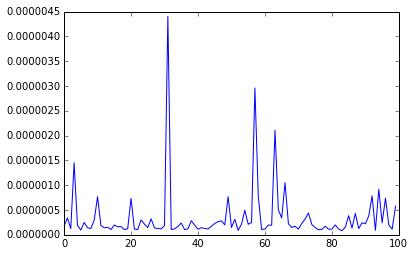

In [28]:
plt.plot(papa)
plt.show()

In [30]:
m_real = vsr.Trs.from_vector(vsr.Vec(1,1,1)) * vsr.Rot.from_bivector(vsr.Biv(1,0,0) * -pi/6)
print(m_real)
m_est = vsr.Mot(*mot)
print(m_est)
print(m_est * m_est.rev())
pso?

0.965926  0.258819  0  0  -0.353553  -0.612372  -0.482963  -0.12941  
-0.965926  -1.68251e-08  0.258819  -4.57666e-08  0.612372  0.335787  0.353553  0.678676  
1  0  -7.12751e-18  6.61744e-24  -2.55111e-17  -2.77556e-17  2.0814e-17  -1.13729  


In [31]:
def polar_decomposition(x):
    xx = x * x.rev()
    sinv = (vsr.Sca(1.0) + (vsr.Drt(- xx[7] / (2 * xx[0]))))
    return x * sinv
print polar_decomposition(m_est)

-0.965926  -1.68251e-08  0.258819  -4.57666e-08  0.612372  0.482963  0.353553  0.12941  


In [ ]:
print polar_decomposition(m_est)

In [ ]:
vsr.Sca(1) + vsr.Drt(1)

In [ ]:
m = mot
a = -0.5 * m[0] * np.eye(3) + \
np.array([0.0, -m[1], m[2], 
          m[1], 0.0, -m[3],
         -m[2], m[3], 0.0]).reshape(3,3)

b = np.array([m[4], m[5], m[6]]).reshape(3,1)
print a
np.linalg.solve(a,b)

In [ ]:
pso?

In [ ]:
rotor = np.array([cos(pi/4),-sin(pi/4),1.0,1.0, 1.0,1.0,1.0]).reshape(7,1)
# rotor = np.array([1.0, 0.0, 0.0,0.0]).reshape(4,1)
vec = np.array([1.0, 0.0, 0.0]).reshape(3,1)
rotate_point(rotor, vec)

In [ ]:
rotor[:4] /= 3.0
rotor